In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
pwd #get the current directory

'/Users/sagunpanta/Desktop'

In [3]:
real_data=pd.read_csv("Github Files/RDC_Inventory_Core_Metrics_Metro_History.csv") #load the dataset

In [4]:
print(real_data.shape) #Shape of the data

(51352, 40)


In [5]:
print(real_data.columns) #list the column names

Index(['month_date_yyyymm', 'cbsa_code', 'cbsa_title', 'HouseholdRank',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price

In [6]:
#prints the number of data with missing values
#real_data.isna().sum()

#gives an overview of the columns
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51352 entries, 0 to 51351
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        51352 non-null  int64  
 1   cbsa_code                                51352 non-null  int64  
 2   cbsa_title                               51352 non-null  object 
 3   HouseholdRank                            51352 non-null  int64  
 4   median_listing_price                     51352 non-null  float64
 5   median_listing_price_mm                  40348 non-null  float64
 6   median_listing_price_yy                  40348 non-null  float64
 7   active_listing_count                     51352 non-null  int64  
 8   active_listing_count_mm                  40347 non-null  float64
 9   active_listing_count_yy                  40348 non-null  float64
 10  median_days_on_market                    51352

In [7]:
real_data=real_data.drop(['cbsa_code', 'HouseholdRank','median_listing_price_mm',
       'median_listing_price_yy','active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count_mm',
       'new_listing_count_yy',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count_mm',
       'price_reduced_count_yy',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price_mm',
       'average_listing_price_yy',
       'total_listing_count_mm', 'total_listing_count_yy',
       'pending_ratio_mm', 'pending_ratio_yy'], axis=1) #drop the columns we won't be using right now 

In [8]:
real_data['cbsa_title'].value_counts() #unique values and their count. 

boone, nc                               56
san angelo, tx                          56
albany, ga                              56
houston-the woodlands-sugar land, tx    56
seneca falls, ny                        56
                                        ..
harrisonburg, va                        56
corinth, ms                             56
ellensburg, wa                          56
fitzgerald, ga                          56
worthington, mn                         56
Name: cbsa_title, Length: 917, dtype: int64

In [9]:
real_data[['city','state']] = real_data['cbsa_title'].str.split('[,]', expand=True) #separate city and state in new columns


In [10]:
real_data['month_date_yyyymm'] = pd.to_datetime(real_data['month_date_yyyymm'].astype(str), format='%Y%m') #change the date format from 202102 to year and month 2021-02-01
real_data=real_data.set_index('month_date_yyyymm') #set date as index

In [11]:
real_data.head() #Let's take a look at how it looks

,cbsa_title,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,city,state
month_date_yyyymm,,,,,,,,,,,,,,,
2021-02-01,"new york-newark-jersey city, ny-nj-pa",629500.0,53700,105.0,16064,696,5056,28031,235.984375,1000.0,1.308260e+06,81731,0.521993,new york-newark-jersey city,ny-nj-pa
2021-02-01,"los angeles-long beach-anaheim, ca",1184500.0,12954,66.5,8604,368,1604,14159,615.315515,1894.0,2.821880e+06,27113,1.093021,los angeles-long beach-anaheim,ca
2021-02-01,"chicago-naperville-elgin, il-in-wi",354950.0,15844,43.0,9628,616,2704,18717,190.627530,1500.0,5.718130e+05,34561,1.181330,chicago-naperville-elgin,il-in-wi
2021-02-01,"dallas-fort worth-arlington, tx",373267.0,6234,36.5,5628,1076,1000,12839,176.621093,2167.0,6.324059e+05,19073,2.059512,dallas-fort worth-arlington,tx
2021-02-01,"houston-the woodlands-sugar land, tx",340624.0,14176,49.5,7964,2520,2660,14870,156.973694,2209.0,5.257749e+05,29046,1.048956,houston-the woodlands-sugar land,tx


In [12]:
real_data.to_csv ('Github Files/Realtor_clean.csv', header=True) #export the clean file to make a tableau dashboard


In [13]:
atl_df=real_data[real_data['cbsa_title'].str.contains('atlanta')] #creating a sub-dataframe by city for indivisual analysis
dfw_df=real_data[real_data['cbsa_title'].str.contains('dallas')]
ny_df=real_data[real_data['cbsa_title'].str.contains('new york')]
la_df=real_data[real_data['cbsa_title'].str.contains('los angeles')]

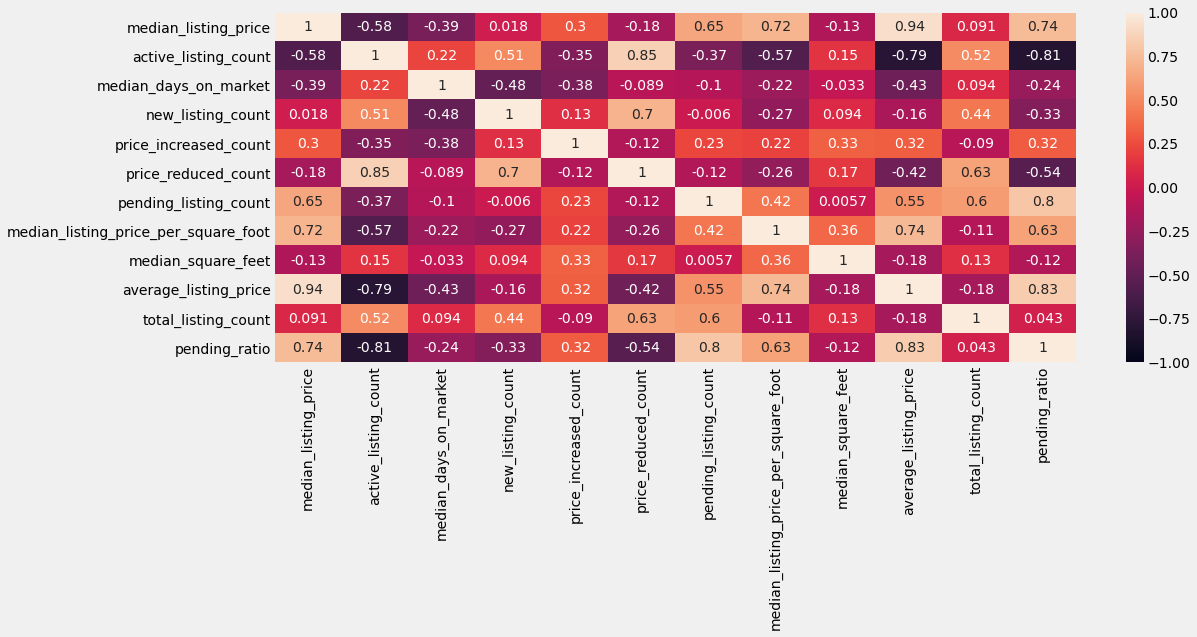

In [14]:
corrMatrix=atl_df.corr() #correlation matrix for the ATL df to see certain relationships
plt.figure(figsize=(16, 6))

sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

<AxesSubplot:>

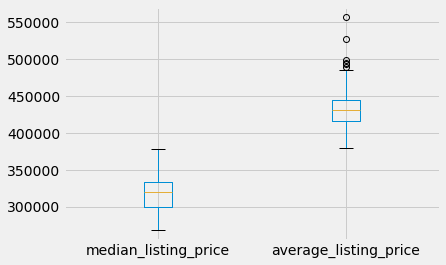

In [15]:
atl_df.boxplot(column=['median_listing_price', 'average_listing_price'])#checking to see distribution and if there are outliers


In [16]:
atl_df['average_listing_price'].describe()#looking at the statistical summary to compare the pricing distribution

count        56.000000
mean     435799.294746
std       35216.558374
min      379376.642400
25%      416235.205675
50%      430355.061300
75%      444125.560900
max      556261.554900
Name: average_listing_price, dtype: float64

In [17]:
atl_df['median_listing_price'].describe()

count        56.000000
mean     317691.114795
std       26397.645672
min      269000.000000
25%      299937.500000
50%      320518.000000
75%      334000.000000
max      377500.000000
Name: median_listing_price, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='average_listing_price', ylabel='Density'>

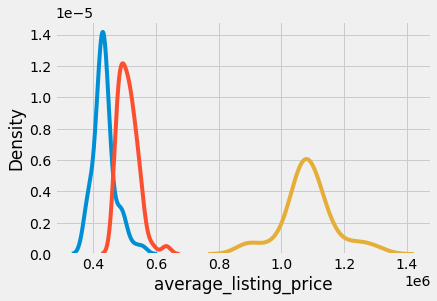

In [18]:
sns.distplot(atl_df['average_listing_price'], hist=False, label="Atlanta")
sns.distplot(dfw_df['average_listing_price'], hist=False, label="Dallas-Fortworth")
sns.distplot(ny_df['average_listing_price'], hist=False, label="New York")

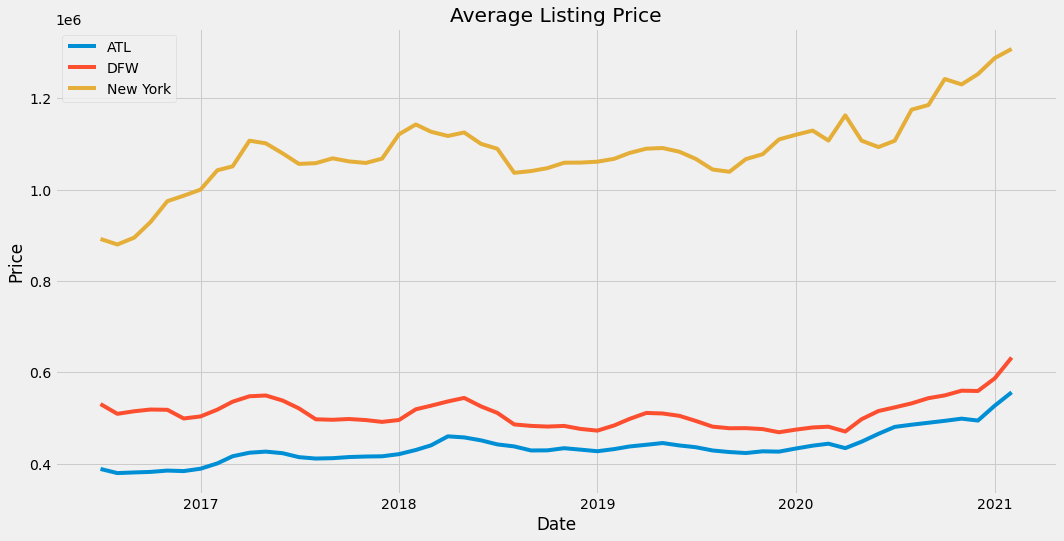

In [19]:
plt.figure(figsize=(16,8))
plt.title('Average Listing Price')
plt.plot(atl_df['average_listing_price'], label='ATL')
plt.plot(dfw_df['average_listing_price'], label='DFW')
plt.plot(ny_df['average_listing_price'], label='New York')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()
#Plotting the price in Line chart to get a better view. We'll do more visualisation in Tableau. But we can see from both graphs that Dallas and Atlanta behave similarly. We'll focus on them for further analysis

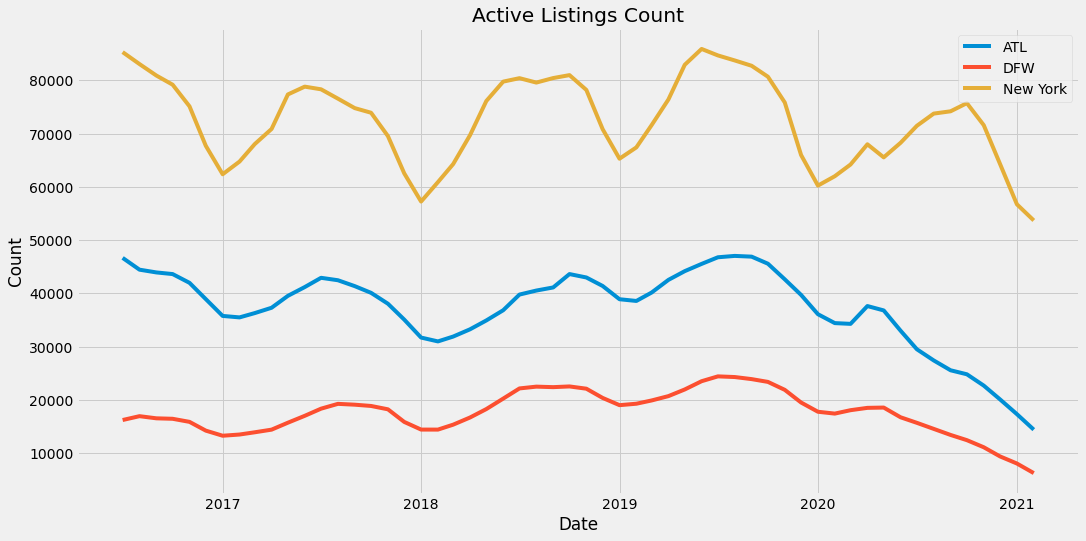

In [20]:
plt.figure(figsize=(16,8))
plt.title('Active Listings Count')
plt.plot(atl_df['active_listing_count'], label='ATL')
plt.plot(dfw_df['active_listing_count'], label='DFW')
plt.plot(ny_df['active_listing_count'], label='New York')

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()
#looking at the current market and the level of supply. Again, Dallas and Atlanta behave similarly. 

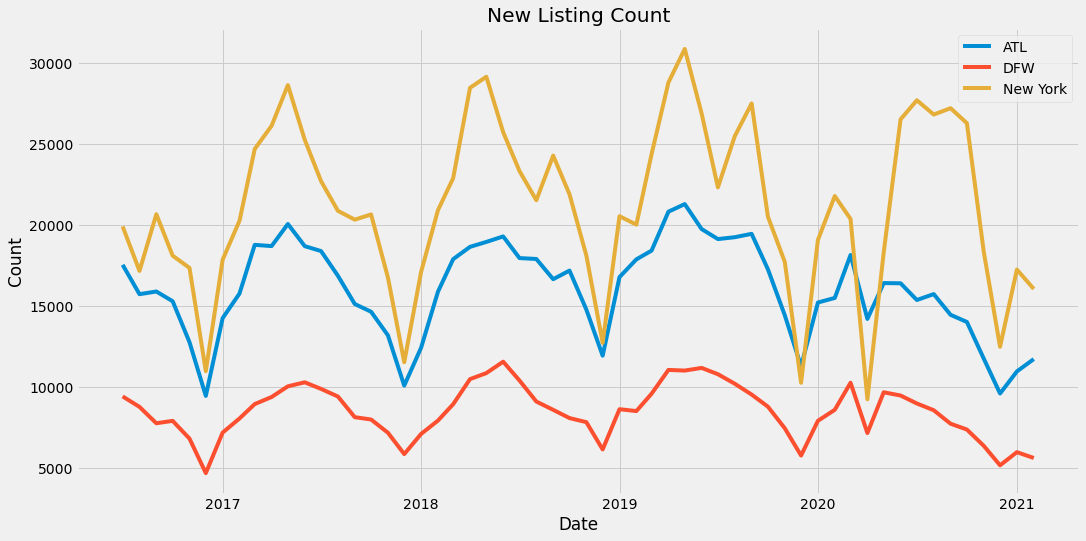

In [21]:
plt.figure(figsize=(16,8))
ax = plt.axes()

plt.title('New Listing Count')
plt.plot(atl_df['new_listing_count'], label='ATL')
plt.plot(dfw_df['new_listing_count'], label='DFW')
plt.plot(ny_df['new_listing_count'], label='New York')
ax.yaxis.get_ticklocs(minor=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

#Checking new listings in the market for the past 5 years. 